In [2]:
from Helper import *
from Helper import r2_keras
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

train_df:-     unit_number  time_in_cycles   sensor5   sensor6   sensor7  sensor10  \
0            1               1  0.183735  0.406802  0.309757  0.726248   
1            1               2  0.283133  0.453019  0.352633  0.628019   

   sensor11  sensor12  sensor14  sensor15  sensor16  sensor18  sensor20  \
0  0.242424  0.109755  0.369048  0.633262  0.205882  0.363986  0.333333   
1  0.212121  0.100242  0.380952  0.765458  0.279412  0.411312  0.333333   

   sensor21  sensor23  sensor24  RUL  label1  label2  cycle_norm  
0       0.0  0.713178  0.724662  191       0       0     0.00000  
1       0.0  0.666667  0.731014  190       0       0     0.00277  


test_df:-     unit_number  time_in_cycles   sensor5   sensor6   sensor7  sensor10  \
0            1               1  0.596215  0.421968  0.282214  0.608871   
1            1               2  0.182965  0.504025  0.225240  0.800403   

   sensor11  sensor12  sensor14  sensor15  sensor16  sensor18  sensor20  \
0  0.365854  0.196475  0.27

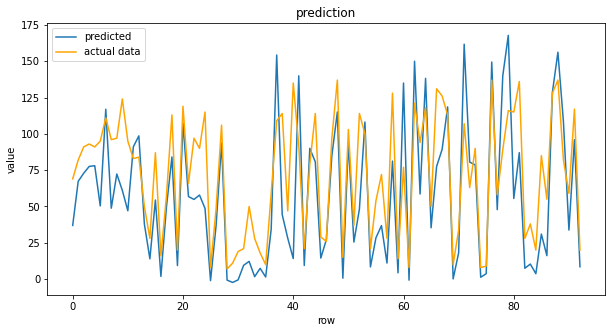

In [3]:
data_link = './Data/'
test_link = 'test_FD001.txt'
train_link = 'train_FD001.txt'
rul_link = "RUL_FD001.txt"
constant_columns = ['sensor3','sensor4','sensor8','sensor13','sensor22','sensor19']
lowcol_columns = ['sensor1','sensor2','sensor9','sensor17']
model_name = './model/model1.h5'

# load model
dependinces = {'r2_keras': r2_keras}
model = load_model(model_name,custom_objects=dependinces)


"""
# Delete columns with constant values condition 1
fd1.drop(columns=['sensor3','sensor4','sensor8','sensor13','sensor22','sensor19'],inplace=True)

# Delete columns with constant values condition 6
fd1.drop(columns=['sensor3','sensor22','sensor19'],inplace=True)
"""

"""
# Drop low correlation columns set 1
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor9','sensor17'])

# Drop low correlation columns set 2
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor4','sensor5','sensor8','sensor9','sensor10','sensor11','sensor13','sensor15','sensor21'])

# Drop low correlation columns set 3
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor9','sensor18','sensor23','sensor24'])

# Drop low correlation columns set 4
train_df = fd1.drop(columns = ['unit_number','sensor4','sensor8','sensor9','sensor10','sensor15','sensor16'])
"""
logger.info('Start Importing Data') 
fd1t = pd.read_csv(data_link+test_link,sep=" ",header=None)
# Dropping columns 26 and 27 cuz they are NaN
logger.info('Drop NaN columns')
fd1t.drop(columns=[26,27],inplace=True)

columns = ['unit_number','time_in_cycles','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11',
'sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21','sensor22','sensor23','sensor24' ]
fd1t.columns = columns
# Delete columns with constant values
logger.info('Delete columns with constant values') 
fd1t.drop(columns=constant_columns,inplace=True)
# Delete Columns with low correlation ~0
logger.info('Delete columns with low correlation')
fd1t = fd1t.drop(columns = lowcol_columns)

# RUL
logger.info('Import RUL') 
RUL = pd.read_csv(data_link+rul_link,sep=" ",header=None)

#Prepare blank train set for preprocessing step:
logger.info('Creating Blank Set')
fd1 = pd.read_csv(data_link+train_link,sep=" ",header=None)
fd1.drop(columns=[26,27],inplace=True)
fd1.columns = columns
fd1.drop(columns=constant_columns,inplace=True)
fd1 = prepare_train_data(fd1)
train_df = fd1.drop(columns = lowcol_columns)

seq_array, label_array, lstm_test_df, sequence_length, sequence_cols = lstm_data_preprocessing(train_df, fd1t, RUL.copy())

logger.info('##### LSTM Model Validation #####') 
MAE, R2, pred = lstm_valid_evaluation(lstm_test_df, model, sequence_length, sequence_cols)
# mae, rmse, r2
LSTM_individual_scorelst = [round(MAE,2), 0, round(R2,2)*100]
print(f'MAE Score:{MAE}\nR2 Score: {R2}')

test_df:-  (13096, 20)
Test Sequence Array Shape: (93, 50, 17)
Test Label Array Shape: (93, 1)
93/1 - 1s - loss: 5853.6207 - mae: 60.9095 - r2_keras: -2.0162e+00

MAE: 60.909454345703125

R^2: -2.0161683559417725
Pred set: (93, 1)


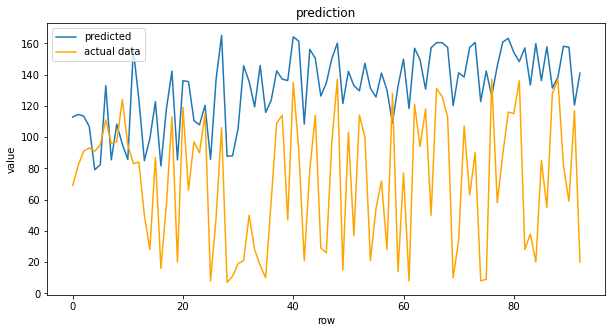

In [1]:
from Helper import *
from Helper import r2_keras
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# load model
dependinces = {'r2_keras': r2_keras}
model = load_model('./model/model1.h5',custom_objects=dependinces)

data_link = './Data/'
test_link = 'test_FD001.txt'
rul_link = "RUL_FD001.txt"
constant_columns = ['sensor3','sensor4','sensor8','sensor13','sensor22','sensor19']
lowcol_columns = ['sensor1','sensor2','sensor9','sensor17']
model_name = './model/model1.h5'
"""
# Delete columns with constant values condition 1
fd1.drop(columns=['sensor3','sensor4','sensor8','sensor13','sensor22','sensor19'],inplace=True)

# Delete columns with constant values condition 6
fd1.drop(columns=['sensor3','sensor22','sensor19'],inplace=True)
"""

"""
# Drop low correlation columns set 1
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor9','sensor17'])

# Drop low correlation columns set 2
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor4','sensor5','sensor8','sensor9','sensor10','sensor11','sensor13','sensor15','sensor21'])

# Drop low correlation columns set 3
train_df = fd1.drop(columns = ['unit_number','sensor1','sensor2','sensor9','sensor18','sensor23','sensor24'])

# Drop low correlation columns set 4
train_df = fd1.drop(columns = ['unit_number','sensor4','sensor8','sensor9','sensor10','sensor15','sensor16'])
"""

fd1t = pd.read_csv(data_link+test_link,sep=" ",header=None)
# Dropping columns 26 and 27 cuz they are NaN
fd1t.drop(columns=[26,27],inplace=True)

columns = ['unit_number','time_in_cycles','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11',
'sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21','sensor22','sensor23','sensor24' ]
fd1t.columns = columns
# Delete columns with constant values
fd1t.drop(columns=constant_columns,inplace=True)
# Delete Columns with low correlation ~0
fd1t = fd1t.drop(columns = lowcol_columns)
# RUL
RUL = pd.read_csv(data_link+rul_link,sep=" ",header=None)

# MinMax Normalization
min_max_scaler = MinMaxScaler()
test_df = fd1t
truth_df = RUL
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
w1 = 30
w0 = 15
cols_normalize = fd1t.columns.difference(['unit_number','time_in_cycles','RUL','label1','label2'])

test_df['cycle_norm'] = test_df['time_in_cycles']
norm_test_df = pd.DataFrame(min_max_scaler.fit_transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)

# We use the ground truth dataset to generate labels for the test data.
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number','max']
truth_df.columns = ['more']
truth_df['unit_number'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more'] # adding true-rul vlaue + max cycle of test data
truth_df.drop('more', axis=1, inplace=True)

# generate RUL for test data
test_df = test_df.merge(truth_df, on=['unit_number'], how='left')
test_df['RUL'] = test_df['max'] - test_df['time_in_cycles']
test_df.drop('max', axis=1, inplace=True) 

# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
print("test_df:- ", test_df.shape)

sequence_length = 50
sequence_cols = list(test_df.columns[:-3])


MAE, R2, pred = lstm_valid_evaluation(test_df, model, sequence_length, sequence_cols)
# mae, rmse, r2
LSTM_individual_scorelst = [round(MAE,2), 0, round(R2,2)*100]